In [68]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import pygal            


# File to Load (Remember to Change These)
file_2018 = "./Resources/WHR2018Chapter2OnlineData.xls"

# Read Purchasing File and store into Pandas data frame


regression_data_2018 = pd.read_excel(file_2018, sheet_name="Figure2.2")
regression_data_2018 = regression_data_2018[["Country", "Happiness score", "Whisker-high", "Whisker-low", "Dystopia (1.92) + residual", "Explained by: GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption"]]
regression_data_2018 = regression_data_2018.replace({"Trinidad & Tobago" : "Trinidad and Tobago", "Hong Kong SAR, China": "China, Hong Kong Special Administrative Region"})
regression_data_2018 = regression_data_2018.rename(columns = {"Happiness score":"Happiness Score",
                                                             "Dystopia (1.92) + residual" : "Dystopia Residual",
                                                             "Explained by: GDP per capita":"GDP R",
                                                             "Explained by: Social support": "Social Support R",
                                                             "Explained by: Healthy life expectancy": "Healthy LE R",
                                                             "Explained by: Freedom to make life choices": "Freedom R",
                                                             "Explained by: Generosity": "Generosity R",
                                                             "Explained by: Perceptions of corruption": "Corruption R"})

average_data_2018= pd.read_excel(file_2018, sheet_name="SupportingFactors")
average_data_2018 = average_data_2018.replace({"North Cyprus": "Northern Cyprus", "Hong Kong S.A.R. of China": "China, Hong Kong Special Administrative Region"})
average_data_2018 = average_data_2018.rename(columns = {"Life ladder, 2015-2017": "Life Ladder",
                                                        "Standard error, life ladder, 2015-2017" : "Life Ladder SE",
                                                        "Log of GDP per person, 2015-2017":"GDP Log",
                                                        "GDP per person, 2015-2017" : "GDP",
                                                        "Healthy life expectancy, 2015-2017" : "Healthy LE",
                                                        "Social support, 2015-2017":"Social Support",
                                                        "Standard error, social support, 2015-2017" : "Social Support SE",
                                                        "Freedom to make life choices, 2015-2017" : "Freedom",
                                                        "Standard error, freedom to make life choices, 2015-2017" : "Freedom SE",
                                                        "Generosity, 2015-2017, without adjustment for GDP per person":"Generosity",
                                                        "Standard error, generosity, 2015-2017" : "Generosity SE",
                                                        "Perceptions of corruption, 2015-2017" : "Corruption",
                                                        "Standard error, perceptions of corruption, 2015-2017" : "Corruption SE"})
                                                    
        
#pd.options.display.max_rows = 4000
#display(regression_data_2018)

merged_data = pd.merge(regression_data_2018, average_data_2018, on="Country", how="outer")
merged_data.head()



,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,GDP,Healthy LE,Social Support,Social Support SE,Freedom,Freedom SE,Generosity,Generosity SE,Corruption,Corruption SE
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,39674.871094,71.517502,0.956149,0.003921,0.946694,0.005143,0.421381,0.010529,0.221270,0.008508
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,64339.679688,71.086586,0.952147,0.004899,0.951561,0.005052,0.625537,0.010838,0.319610,0.009513
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,45999.960938,71.312271,0.955462,0.004486,0.948895,0.004695,0.579054,0.010585,0.193662,0.008053
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,44854.480469,72.755981,0.977497,0.004214,0.943219,0.007094,0.684818,0.014125,0.691878,0.012740
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,57333.109375,73.173759,0.938523,0.005689,0.929152,0.006759,0.549967,0.012200,0.288248,0.010439


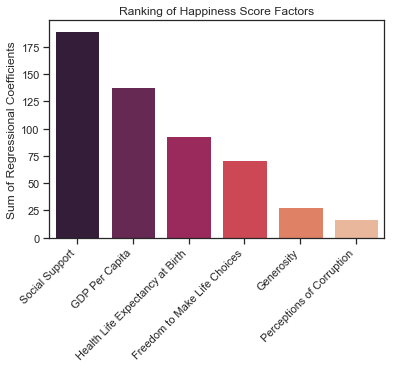

In [69]:
regression_data_2018_sum = pd.DataFrame({"Sum" : merged_data[["GDP R", "Social Support R", "Healthy LE R","Freedom R", "Generosity R", "Corruption R"]].sum()})
regression_data_2018_sum = regression_data_2018_sum.sort_values(by="Sum", ascending=False)

factors = ["Social Support", "GDP Per Capita", "Health Life Expectancy at Birth", "Freedom to Make Life Choices", "Generosity", "Perceptions of Corruption"]

factors_values = regression_data_2018_sum["Sum"]

x_axis = np.arange(len(factors))

#plt.bar(x_axis, factors_values, color = "blue", align="center")
sns.barplot(x_axis, factors_values, palette="rocket")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, factors, rotation = 45, ha="right")

plt.title("Ranking of Happiness Score Factors")
plt.ylabel("Sum of Regressional Coefficients")

plt.savefig("./Images/Ranking_Happiness_Factors.png")


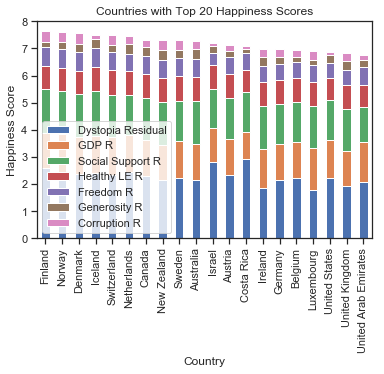

In [105]:
happiest_stacked = merged_data[0:20]

x= happiest_stacked[['Country','Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R']]
y= x.set_index('Country')
z=y.groupby('Country').mean()
happiest_stacked.set_index("Country",drop=True, inplace=True)
happiest_stacked.sort_values(by=['Happiness Score'], ascending=False)[['Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R']].plot.bar(stacked=True)

plt.title("Countries with Top 20 Happiness Scores")
plt.ylabel("Happiness Score")

plt.savefig("./Images/Top_20.png")


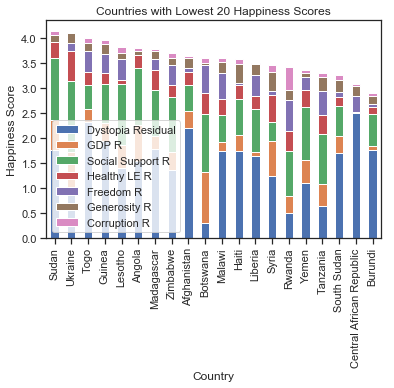

In [106]:
unhappiest_stacked = merged_data[136:156]

x= unhappiest_stacked[['Country','Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R', ]]
y= x.set_index('Country')
z=y.groupby('Country').mean()
unhappiest_stacked.set_index("Country",drop=True, inplace=True)
unhappiest_stacked.sort_values(by=['Happiness Score'], ascending=False)[['Dystopia Residual','GDP R','Social Support R','Healthy LE R','Freedom R','Generosity R','Corruption R']].plot.bar(stacked=True)

plt.title("Countries with Lowest 20 Happiness Scores")
plt.ylabel("Happiness Score")

plt.savefig("./Images/Lowest_20.png")

In [70]:
country_codes_file = "./Resources/country-codes_csv.csv"
country_codes_full = pd.read_csv(country_codes_file)
country_codes = country_codes_full[["official_name_en", "ISO3166-1-Alpha-3"]]
country_codes = country_codes.rename(columns = {"official_name_en" : "Country" , "ISO3166-1-Alpha-3" : "Country Code"})

{'col1': [1, 2], 'col2': [3, 4]}
cyprus_df = pd.DataFrame({"Country" : ["Northern Cyprus"] , "Country Code" : ["CYP"]})
country_codes = country_codes.append(cyprus_df)

pd.options.display.max_rows = 4000
display(country_codes)



,Country,Country Code
0,Republic of China,TWN
1,Afghanistan,AFG
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
5,Andorra,AND
6,Angola,AGO
7,Anguilla,AIA
8,Antarctica,ATA
9,Antigua and Barbuda,ATG


In [71]:
cleaned_data = merged_data.replace(
    {"United States": "United States of America", 
     "United Kingdom": "United Kingdom of Great Britain and Northern Ireland",
     "Czech Republic": "Czechia",
     "Taiwan Province of China": "Republic of China",
     "Russia": "Russian Federation",
     "South Korea": "Republic of Korea",
     "Moldova":"Republic of Moldova",
     "Bolivia":"Bolivia (Plurinational State of)",
     "Venezuela":"Venezuela (Bolivarian Republic of)",
     "Macedonia":"The former Yugoslav Republic of Macedonia",
     "Vietnam": "Viet Nam",
     "Palestinian Territories": "State of Palestine",
     "Iran": "Iran (Islamic Republic of)",
     "Congo (Brazzaville)": "Congo",
     "Congo (Kinshasa)" : "Democratic Republic of the Congo",
     "Ivory Coast": "Côte d'Ivoire",
     "Syria": "Syrian Arab Republic",
     "Tanzania": "United Republic of Tanzania",
     "Laos": "Lao People's Democratic Republic",
    })

cleaned_data = pd.merge(cleaned_data, country_codes, on="Country", how="left")

cleaned_data = cleaned_data.drop([156])
     
cleaned_data.loc[cleaned_data['Country Code'].isnull(), :]

cleaned_data

,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,Healthy LE,Social Support,Social Support SE,Freedom,Freedom SE,Generosity,Generosity SE,Corruption,Corruption SE,Country Code
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,71.517502,0.956149,0.003921,0.946694,0.005143,0.421381,0.010529,0.221270,0.008508,FIN
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,71.086586,0.952147,0.004899,0.951561,0.005052,0.625537,0.010838,0.319610,0.009513,NOR
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,71.312271,0.955462,0.004486,0.948895,0.004695,0.579054,0.010585,0.193662,0.008053,DNK
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,72.755981,0.977497,0.004214,0.943219,0.007094,0.684818,0.014125,0.691878,0.012740,ISL
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,73.173759,0.938523,0.005689,0.929152,0.006759,0.549967,0.012200,0.288248,0.010439,CHE
5,Netherlands,7.4413,7.498353,7.384247,2.448425,1.360909,1.488277,0.877710,0.638065,0.333358,...,71.619995,0.913711,0.005946,0.910887,0.006232,0.656769,0.010446,0.402849,0.009797,NLD
6,Canada,7.3285,7.420735,7.236264,2.305750,1.330412,1.531910,0.895846,0.653067,0.320637,...,72.190804,0.931540,0.007018,0.923506,0.010606,0.625681,0.015014,0.409656,0.016226,CAN
7,New Zealand,7.3238,7.400652,7.246948,2.156168,1.268016,1.600625,0.876076,0.668867,0.365170,...,71.568550,0.959619,0.004452,0.936796,0.006444,0.682525,0.011552,0.228877,0.009684,NZL
8,Sweden,7.3145,7.388290,7.240710,2.216858,1.355439,1.501481,0.913462,0.659404,0.284668,...,72.745270,0.919106,0.005798,0.928837,0.006224,0.580782,0.011317,0.239266,0.009315,SWE
9,Australia,7.2721,7.358463,7.185737,2.139236,1.339951,1.572536,0.910445,0.646526,0.361005,...,72.650299,0.948141,0.005685,0.918004,0.007727,0.694879,0.012153,0.388529,0.012644,AUS


In [72]:
plotly.tools.set_credentials_file(username='VarshaVarsha', api_key='2yihlG9CZo1grhbdpdg4')

data = [ dict(
        type = 'choropleth',
        locations = cleaned_data['Country Code'],
        z = cleaned_data['Happiness Score'],
        text = cleaned_data['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Happiness<br>Score'),
      ) ]

layout = dict(
    title = 'Happiness Scores Across the World<br>Source:\
            <http://worldhappiness.report/ed/2017/>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

plt.savefig("./Images/Happiness_World_Map.png")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~VarshaVarsha/0 or inside your plot.ly account where it is named 'd3-world-map'


<Figure size 432x288 with 0 Axes>

In [73]:
weather_file = "./Resources/cckp_historical_data_0.xls"
temperature_data= pd.read_excel(weather_file, sheet_name="Country_temperatureCRU")
temperature_data = temperature_data[["ISO_3DIGIT", "Annual_temp"]]
temperature_data = temperature_data.rename(columns = {"ISO_3DIGIT" : "Country Code", "Annual_temp" : "Annual Temperature"})
temperature_data.head()

precipitation_data = pd.read_excel(weather_file, sheet_name = "Country_precipitationCRU")
precipitation_data = precipitation_data[["ISO_3DIGIT", "Annual_precip"]]
precipitation_data = precipitation_data.rename(columns = {"ISO_3DIGIT" : "Country Code", "Annual_precip" : "Annual Precipitation"})
precipitation_data.head()

weather_merge = cleaned_data.merge(temperature_data,on="Country Code", how="inner").merge(precipitation_data,on="Country Code", how="inner")
weather_merge


,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,Social Support SE,Freedom,Freedom SE,Generosity,Generosity SE,Corruption,Corruption SE,Country Code,Annual Temperature,Annual Precipitation
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,0.003921,0.946694,0.005143,0.421381,0.010529,0.221270,0.008508,FIN,1.347861,524.701104
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,0.004899,0.951561,0.005052,0.625537,0.010838,0.319610,0.009513,NOR,0.753892,1051.840741
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,0.004486,0.948895,0.004695,0.579054,0.010585,0.193662,0.008053,DNK,7.818978,698.649857
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,0.004214,0.943219,0.007094,0.684818,0.014125,0.691878,0.012740,ISL,1.351409,1039.821209
4,Switzerland,7.4873,7.569994,7.404606,2.319529,1.419727,1.548998,0.927076,0.659779,0.255525,...,0.005689,0.929152,0.006759,0.549967,0.012200,0.288248,0.010439,CHE,4.749057,1646.412455
5,Netherlands,7.4413,7.498353,7.384247,2.448425,1.360909,1.488277,0.877710,0.638065,0.333358,...,0.005946,0.910887,0.006232,0.656769,0.010446,0.402849,0.009797,NLD,9.201738,766.068878
6,Canada,7.3285,7.420735,7.236264,2.305750,1.330412,1.531910,0.895846,0.653067,0.320637,...,0.007018,0.923506,0.010606,0.625681,0.015014,0.409656,0.016226,CAN,-7.144580,457.469053
7,New Zealand,7.3238,7.400652,7.246948,2.156168,1.268016,1.600625,0.876076,0.668867,0.365170,...,0.004452,0.936796,0.006444,0.682525,0.011552,0.228877,0.009684,NZL,9.975832,1790.945674
8,Sweden,7.3145,7.388290,7.240710,2.216858,1.355439,1.501481,0.913462,0.659404,0.284668,...,0.005798,0.928837,0.006224,0.580782,0.011317,0.239266,0.009315,SWE,1.546351,621.150333
9,Australia,7.2721,7.358463,7.185737,2.139236,1.339951,1.572536,0.910445,0.646526,0.361005,...,0.005685,0.918004,0.007727,0.694879,0.012153,0.388529,0.012644,AUS,21.506676,473.091500


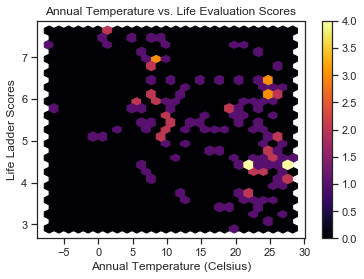

In [75]:
plt.hexbin(x= weather_merge["Annual Temperature"], y=weather_merge["Life Ladder"], gridsize=25, cmap='inferno')
plt.colorbar()
plt.title("Annual Temperature vs. Life Evaluation Scores")
plt.xlabel("Annual Temperature (Celsius)")
plt.ylabel("Life Ladder Scores")

plt.savefig("./Images/Temperature_LE.png")

plt.show()

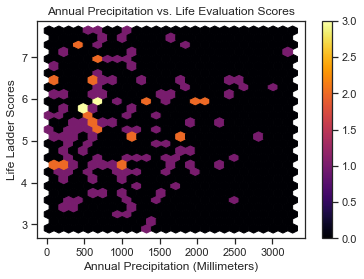

In [76]:
plt.hexbin(x= weather_merge["Annual Precipitation"], y=weather_merge["Life Ladder"], gridsize=25, cmap='inferno')
plt.colorbar()
plt.title("Annual Precipitation vs. Life Evaluation Scores")
plt.xlabel("Annual Precipitation (Millimeters)")
plt.ylabel("Life Ladder Scores")


plt.savefig("./Images/Precipitation_LE.png")

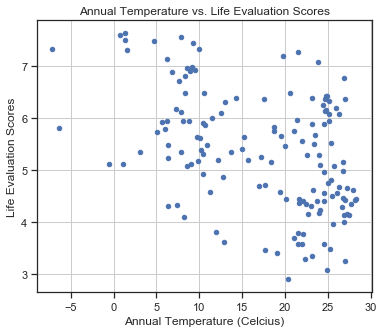

In [77]:
weather_merge.plot(kind="scatter",y="Life Ladder",x="Annual Temperature", grid=True, figsize=(6,5),
           title="Annual Temperature vs. Life Evaluation Scores")
plt.xlabel("Annual Temperature (Celcius)")
plt.ylabel("Life Evaluation Scores")

plt.savefig("./Images/Scatter_Temperature_LE.png")

plt.show()

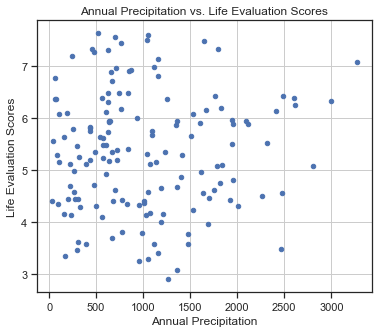

In [78]:
weather_merge.plot(kind="scatter",y="Life Ladder",x="Annual Precipitation", grid=True, figsize=(6,5),
           title="Annual Precipitation vs. Life Evaluation Scores")
plt.xlabel("Annual Precipitation")
plt.ylabel("Life Evaluation Scores")

plt.savefig("./Images/Scatter_Precipitation_LE.png")

plt.show()

In [79]:
religion_file = "./Resources/Gallup Religion Data.xlsx"
religion_data= pd.read_excel(religion_file, sheet_name="Religion 1")
religion2_data= pd.read_excel(religion_file, sheet_name="Religion 2")

del religion_data["Country (Uppercase)"]
del religion2_data["Country (Uppercase)"]

religion_data = religion_data.merge(religion2_data,on="Country", how="outer")
religion_data




,Country,A religious person,Not a religious person,A convinced atheist,Do not know / no response,God,Life after death,People have a soul,Hell,Heaven
0,Albania,0.56,0.30,0.09,0.05,0.80,0.40,0.57,0.40,0.42
1,Argentina,0.78,0.16,0.04,0.02,0.91,0.63,0.84,0.57,0.75
2,Armenia,0.92,0.04,0.02,0.01,0.93,0.41,0.72,0.41,0.44
3,Australia,0.31,0.50,0.13,0.07,0.46,0.42,0.63,0.31,0.42
4,Austria,0.41,0.43,0.10,0.06,0.50,0.39,0.72,0.13,0.29
5,Azerbaijan,0.35,0.64,0.00,0.00,1.00,0.82,0.81,0.83,0.84
6,Bangladesh,0.80,0.19,0.00,0.01,0.99,0.99,0.99,0.98,0.97
7,Belgium,0.28,0.43,0.21,0.08,0.29,0.24,0.50,0.09,0.16
8,Bosnia & Herzegovina,0.75,0.21,0.01,0.02,0.87,0.58,0.82,0.70,0.71
9,Brazil,0.82,0.15,0.02,0.01,0.98,0.65,0.90,0.68,0.76


In [80]:
religion_data = religion_data.replace(
    {"Bosnia & Herzegovina": "Bosnia and Herzegovina", 
     "Czech Republic" : "Czechia",
     "Dr Congo" : "Democratic Republic of the Congo",
     #"Fiji" is not in happiness data
     "Hong Kong" : "China, Hong Kong Special Administrative Region",
     "Iran" : "Iran (Islamic Republic of)",
     "Ivory Coast" : "Côte d'Ivoire",
     "Macedonia" : "The former Yugoslav Republic of Macedonia",
     "Palestinian Terr." : "State of Palestine",
     #"Papua New Guinea" is not in happiness data
     "Russia" : "Russian Federation",
     "South Korea" : "Republic of Korea",
     "Uk" : "United Kingdom of Great Britain and Northern Ireland",
     "Usa" : "United States of America",
     "Vietnam" : "Viet Nam"
    })


religion_merge = pd.merge(cleaned_data, religion_data, on="Country", how="inner")

#religion_merge.loc[merge_table['Country Code'].isnull(), :]

print(len(religion_merge))
religion_merge



66


,Country,Happiness Score,Whisker-high,Whisker-low,Dystopia Residual,GDP R,Social Support R,Healthy LE R,Freedom R,Generosity R,...,Country Code,A religious person,Not a religious person,A convinced atheist,Do not know / no response,God,Life after death,People have a soul,Hell,Heaven
0,Finland,7.6321,7.694913,7.569287,2.595186,1.305095,1.592134,0.874454,0.680633,0.191638,...,FIN,0.39,0.47,0.08,0.07,0.43,0.34,0.61,0.17,0.31
1,Norway,7.5937,7.657077,7.530323,2.383242,1.455627,1.582340,0.860763,0.686420,0.285636,...,NOR,0.30,0.50,0.12,0.08,0.36,0.32,0.63,0.16,0.30
2,Denmark,7.5553,7.623292,7.487309,2.370179,1.351153,1.590453,0.867933,0.683251,0.284392,...,DNK,0.32,0.47,0.14,0.07,0.36,0.23,0.57,0.06,0.20
3,Iceland,7.4952,7.592534,7.397867,2.425990,1.343301,1.644378,0.913802,0.676502,0.353233,...,ISL,0.46,0.32,0.17,0.05,0.44,0.40,0.65,0.06,0.26
4,Canada,7.3285,7.420735,7.236264,2.305750,1.330412,1.531910,0.895846,0.653067,0.320637,...,CAN,0.37,0.47,0.10,0.06,0.55,0.45,0.69,0.28,0.40
5,Sweden,7.3145,7.388290,7.240710,2.216858,1.355439,1.501481,0.913462,0.659404,0.284668,...,SWE,0.22,0.55,0.18,0.05,0.22,0.29,0.61,0.09,0.18
6,Australia,7.2721,7.358463,7.185737,2.139236,1.339951,1.572536,0.910445,0.646526,0.361005,...,AUS,0.31,0.50,0.13,0.07,0.46,0.42,0.63,0.31,0.42
7,Israel,7.1900,7.256923,7.123078,2.816727,1.243824,1.432910,0.888351,0.464048,0.262456,...,ISR,0.39,0.50,0.08,0.03,0.75,0.48,0.79,0.43,0.50
8,Austria,7.1394,7.209448,7.069352,2.319478,1.341352,1.504102,0.891358,0.617242,0.242011,...,AUT,0.41,0.43,0.10,0.06,0.50,0.39,0.72,0.13,0.29
9,Ireland,6.9771,7.054669,6.899531,1.844298,1.447582,1.582635,0.876285,0.613965,0.306510,...,IRL,0.40,0.47,0.09,0.04,0.59,0.46,0.66,0.27,0.44


OSError: dlopen() failed to load a library: cairo / cairo-2 / cairo-gobject-2

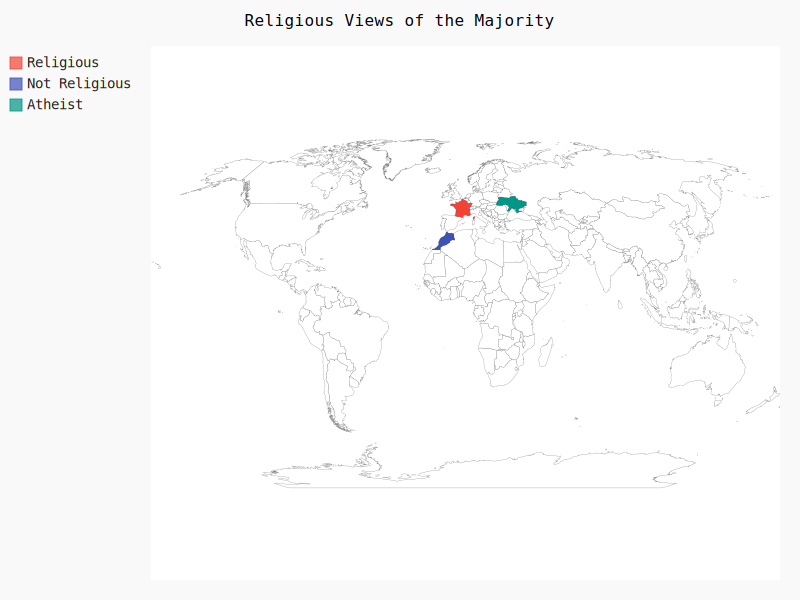

In [81]:
country_codes_full = country_codes_full.rename(columns={"official_name_en":"Country"})
map_religion_data = pd.merge(religion_data,country_codes_full, on="Country", how="inner")
map_religion_data= map_religion_data[["Country", "ISO3166-1-Alpha-2", "A religious person", "Not a religious person", "A convinced atheist", "Do not know / no response "]]
map_religion_data = map_religion_data.rename(columns={"ISO3166-1-Alpha-2":"Country Code 2"})


worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Religious Views of the Majority'
worldmap_chart.add('Religious', ['fr'])
worldmap_chart.add('Not Religious', ['ma'])
worldmap_chart.add('Atheist', ['ua'])
#worldmap_chart.add('Undecided/No Response' , [])

worldmap_chart

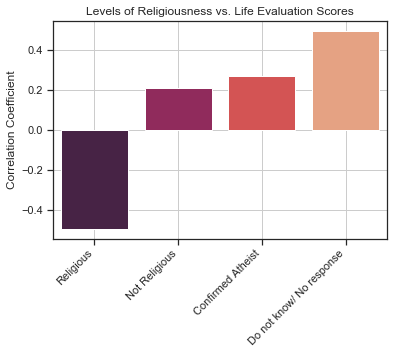

In [82]:
religion_corr_ranking = pd.DataFrame({"Correlation Coefficient" : religion_merge[["Life Ladder","A religious person", "Not a religious person", "A convinced atheist","Do not know / no response "]].corr('pearson')["Life Ladder"]})
religion_corr_ranking = religion_corr_ranking.drop(["Life Ladder"])

religion_corr_ranking = religion_corr_ranking.sort_values(by="Correlation Coefficient", ascending=True)

factors_r = ["Religious", "Not Religious", "Confirmed Atheist", "Do not know/ No response"]

factors_values_r = religion_corr_ranking["Correlation Coefficient"]

x_axis_r = np.arange(len(factors_r))

#plt.bar(x_axis_religion, factors_values_religion, color = "blue", align="center")
sns.barplot(x_axis_r, factors_values_r, palette="rocket")

tick_locations_r = [value for value in x_axis_r]
plt.xticks(tick_locations_r, factors_r, rotation = 45, ha="right")
plt.grid()

plt.title("Levels of Religiousness vs. Life Evaluation Scores")

plt.savefig("./Images/Religion1_LE.png")


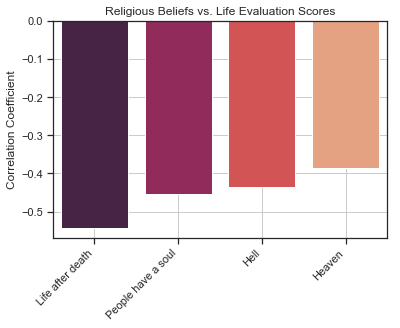

In [83]:
religion2_corr_ranking = pd.DataFrame({"Correlation Coefficient" : religion_merge[["Life Ladder","Life after death", "People have a soul", "Hell","Heaven"]].corr('pearson')["Life Ladder"]})
religion2_corr_ranking = religion2_corr_ranking.drop(["Life Ladder"])

religion2_corr_ranking = religion2_corr_ranking.sort_values(by="Correlation Coefficient", ascending=True)

factors_r2 = ["Life after death", "People have a soul", "Hell", "Heaven"]

factors_values_r2 = religion2_corr_ranking["Correlation Coefficient"]

x_axis_r2 = np.arange(len(factors_r2))

#plt.bar(x_axis_religion, factors_values_religion, color = "blue", align="center")
sns.barplot(x_axis_r2, factors_values_r2, palette="rocket")

tick_locations_r2 = [value for value in x_axis_r2]
plt.xticks(tick_locations_r2, factors_r2, rotation = 45, ha="right")
plt.grid()

plt.title("Religious Beliefs vs. Life Evaluation Scores")

plt.savefig("./Images/Religion2_LE.png")

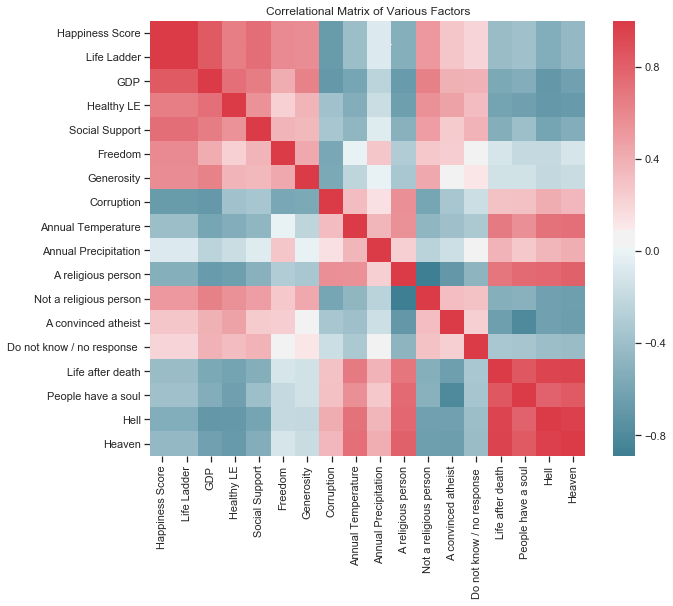

In [84]:
correlational_data =  religion_merge.merge(temperature_data,on="Country Code", how="outer").merge(precipitation_data,on="Country Code", how="inner")

correlational_data = correlational_data[["Happiness Score", "Life Ladder", "GDP", "Healthy LE", "Social Support", "Freedom", "Generosity", "Corruption", "Annual Temperature", "Annual Precipitation", "A religious person", "Not a religious person", "A convinced atheist", "Do not know / no response ", "Life after death", "People have a soul", "Hell", "Heaven"]]          
                                    
f, ax = plt.subplots(figsize=(10, 8))
corr = correlational_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)                                   
                                

plt.title("Correlational Matrix of Various Factors")

plt.savefig("./Images/Correlational_Matrix.png")